Vamos começar a batalha!


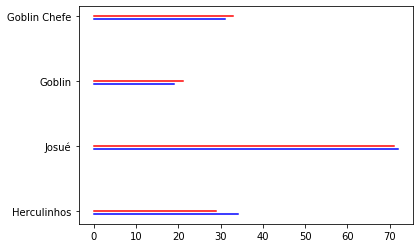

Vez de  Herculinhos !
Escolha o alvo:
1 - Herculinhos
2 - Josué
3 - Goblin
4 - Goblin Chefe
3
Escolha:
1 - Ataque físico
2 - Concentração arcana
3 - Bola de fogo
3
Role 1d8 para o ataque de Herculinhos : 7
Role 1d6 para defesa de Goblin : 4
Herculinhos infligiu 16 de dano em Goblin !


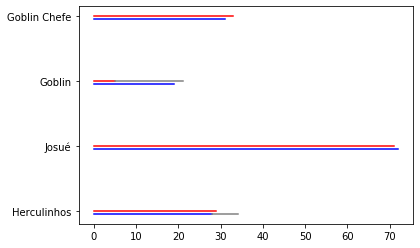

Vez de  Josué !
Escolha o alvo:
1 - Herculinhos
2 - Josué
3 - Goblin
4 - Goblin Chefe
4
Escolha:
1 - Ataque físico
2 - Bola de fogo
2
Role 1d20 para o ataque de Josué : 20
Role 1d8 para defesa de Goblin Chefe : 3
Josué infligiu 33 de dano em Goblin Chefe !


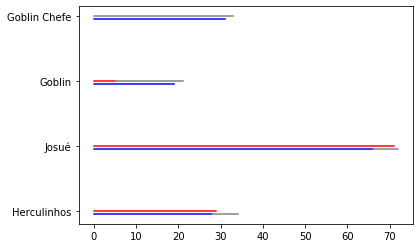

Vez de  Goblin !
Escolha o alvo:
1 - Herculinhos
2 - Josué
3 - Goblin
4 - Goblin Chefe
1
Escolha:
1 - Ataque físico
1
Role 1d6 para o ataque de Goblin : 5
Role 1d6 para defesa de Herculinhos : 3
Goblin infligiu 3 de dano em Herculinhos !


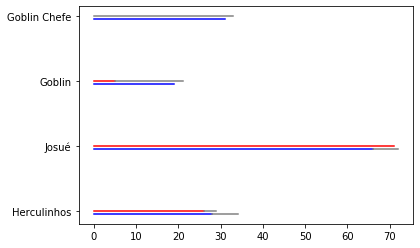

Vez de  Herculinhos !
Escolha o alvo:
1 - Herculinhos
2 - Josué
3 - Goblin
4 - Goblin Chefe
3
Escolha:
1 - Ataque físico
2 - Concentração arcana
3 - Bola de fogo
2
Role 1d8 para o ataque de Herculinhos : 5
Role 1d6 para defesa de Goblin : 6
Herculinhos infligiu 1 de dano em Goblin !


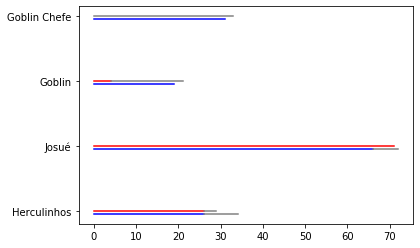

Vez de  Josué !
Escolha o alvo:
1 - Herculinhos
2 - Josué
3 - Goblin
4 - Goblin Chefe
3
Escolha:
1 - Ataque físico
2 - Bola de fogo
2
Role 1d20 para o ataque de Josué : 14
Role 1d6 para defesa de Goblin : 2
Josué infligiu 29 de dano em Goblin !


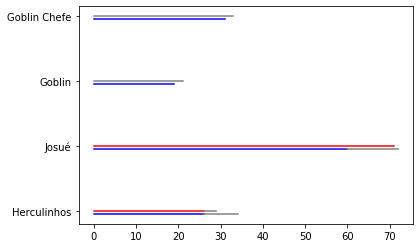

A luta terminou!


In [0]:
# PROGRAMA PESSOAL PARA FACILITAR AS CONTAS POR PARTE DO MESTRE DURANTE UMA BATALHA DE RPG DE MESA
# O MODELO DE RPG UTILIZADO É DE MINHA AUTORIA E RESGATA ELEMENTOS DE OUTROS MODELOS
# A INTENÇÃO É O PROGRAMA LEVAR EM CONTA TODOS OS ATRIBUTOS DOS PERSONAGENS (CLASSE,RAÇA,ARMA,ARMADURA,STATS)
# E CALCULAR O DANO, PERDA DE MANA PLOTANDO O GRÁFICO DE BATALHA E AUXILIANDO NOS TURNOS

import numpy as np
import matplotlib.pyplot as plt

class char:
  def __init__(self,nome,raça,classe,lv,stats,skill,arma,armor):
    self.nome=nome
    self.raça=raça
    self.classe=classe
    self.stats=stats
    self.lv=lv
    self.FOR=stats[0]
    self.VIT=stats[1]
    self.RES=stats[2]
    self.HAB=stats[3]
    self.INT=stats[4]
    self.skill=skill
    self.arma=arma
    self.armor=armor
    self.hpmax=0
    self.mpmax=0
    ##########################################
    #RAÇAS
    if self.raça=='humano':
      self.hpmax+= 5+3*self.VIT+3*self.lv
    if self.raça=='goblin':
      self.hpmax+= 5+2*self.VIT+2*self.lv
    if self.raça=='elfo':
      self.hpmax+= 5+2*self.VIT+3*self.lv
    if self.raça=='semitank':
      self.hpmax+= 10+4*self.VIT+3*self.lv
    #CLASSES
    if self.classe=='mago':
      self.mpmax+=10+2*self.INT+3*self.lv
    if self.classe=='guerreiro':
      self.mpmax+= 5+2*self.INT+2*self.lv
    if self.classe=='ladino':
      self.mpmax+= 5+2*self.INT+2*self.lv
    ##########################################
    self.hp=self.hpmax
    self.mp=self.mpmax
  def nome(self):
    return self.nome
  def FOR(self):
    return self.FOR
  def VIT(self):
    return self.VIT
  def RES(self):
    return self.RES
  def HAB(self):
    return self.HAB
  def INT(self):
    return self.INT
  def stats(self):
    return self.stats
  def hpmax(self):
    return self.hpmax
  def mpmax(self):
    return self.mpmax
  def hp(self):
    return self.hp
  def mp(self):
    return self.mp
  def hpset(self,dano):
    if self.hp>=dano:
      self.hp+=-dano
    else:
      self.hp=0
  def mpset(self,custo):
    if self.mp>=custo:
      self.mp+=-custo
    else:
      self.mp=0
  def skill(self):
    return self.skill
  def arma(self):
    return self.arma
  def armor(self):
    return self.armor

class skill:
  def __init__(self,nome,mp,hp,scale):
    self.nome=nome
    self.mp=mp
    self.hp=hp
    self.scale=scale
    self.FOR=scale[0]
    self.VIT=scale[1]
    self.RES=scale[2]
    self.HAB=scale[3]
    self.INT=scale[4]
  def nome(self):
    return self.nome
  def mp(self):
    return self.mp
  def hp(self):
    return self.hp
  def scale(self):
    return self.scale
  def FOR(self):
    return self.FOR
  def VIT(self):
    return self.VIT
  def RES(self):
    return self.RES
  def HAB(self):
    return self.HAB
  def INT(self):
    return self.INT

################################################################################################
#LISTA DE HABILIDADES
Ataque=skill('Ataque físico',0,0,[1,0,0,0,0])
Ataquemag=skill('Concentração arcana',2,0,[0,0,0,0,1])
Boladefogo=skill('Bola de fogo',6,0,[0,0,0,1,2])
Martelada=skill('Martelada',4,0,[2,0,0,1,0])
Flechacelestial=skill('Flecha celestial',4,0,[0,0,0,1,1])

# LISTA DE PERSONAGENS    
Goblin=char('Goblin','goblin','guerreiro',4,[5,4,4,5,3],[Ataque],6,6)
Goblinchefe=char('Goblin Chefe','goblin','guerreiro',8,[7,6,5,5,5],[Ataque,Martelada],10,8)
Nopad=char('Herculinhos','humano','mago',4,[3,4,4,5,6],[Ataque,Ataquemag,Boladefogo],8,6)
Lolo=char('Josué','humano','mago',16,[4,6,4,7,7],[Ataque,Boladefogo],20,12)
Hugo=char('Zwinglio','humano','guerreiro',16,[8,5,9,5,1],[Ataque,Martelada],20,20)
################################################################################################

def ataque(personagem):
  dano=0
  print('Escolha:')
  for i in range(len(char.skill(personagem))):
    print(i+1,'-',skill.nome(char.skill(personagem)[i]))
  s=int(input(''))
  if char.mp(personagem)<skill.mp(char.skill(personagem)[s-1]):
    print(char.nome(personagem),'não possui mana o suficiente!')
    dano+=ataque(personagem)
  elif char.hp(personagem)<skill.hp(char.skill(personagem)[s-1]):
    print(char.nome(personagem),'não possui HP o suficiente!')
    dano+=ataque(personagem)
  else:
    char.mpset(personagem,skill.mp(char.skill(personagem)[s-1]))
    char.hpset(personagem,skill.hp(char.skill(personagem)[s-1]))
    dano+=int(input('Role 1d%s para o ataque de %s : ' % (char.arma(personagem),char.nome(personagem))))
    for i in range(5):
      dano+=char.stats(personagem)[i]*(skill.scale(char.skill(personagem)[s-1])[i])
  return dano

def defesa(personagem):
    d=0
    d+=int(input('Role 1d%s para defesa de %s : '  % (char.armor(personagem),char.nome(personagem))))
    d+=char.RES(personagem)
    return d
  
    
def plot(L):
  for i in range(len(L)):
    plt.plot([0,char.hp(L[i])],[char.nome(L[i]),char.nome(L[i])],color='red')
    plt.plot([char.hp(L[i]),char.hpmax(L[i])],[char.nome(L[i]),char.nome(L[i])],color="gray")
    plt.plot([0,char.mp(L[i])],[i-0.05,i-0.05],color='blue')
    plt.plot([char.mp(L[i]),char.mpmax(L[i])],[i-0.05,i-0.05],color="gray")
  plt.show()
def turno(L,T):
  for i in range(len(L)):
    if char.hp(L[i])>0:
      print('Vez de ',char.nome(L[i]),'!')
      print('Escolha o alvo:')
      for k in range(len(L)):
        print(k+1,'-',char.nome(L[k]))
      alvo=L[int(input(''))-1]
      d=0
      d+=ataque(L[i])
      r=0
      r+=defesa(alvo)
      if d>=r:
        d-=r
      else:
        d=0
      char.hpset(alvo,d)
      print(char.nome(L[i]), 'infligiu', d, 'de dano em',char.nome(alvo),'!')
      plot(L)
      Z1=[]
      Z2=[]
      T1=[]
      T2=[]
      for i in range(len(L)):
        if T[i]==1:
          T1=T1+[char.hp(L[i])]
          Z1=Z1+[0]
        if T[i]==2:
          T2=T2+[char.hp(L[i])]
          Z2=Z2+[0]
      if T1==Z1 or T2==Z2:
        break
  if T1==Z1 or T2==Z2:
    print('A luta terminou!')
  else:
    turno(L,T)
    
    
    
def batalha(L,T): #L lista em ordem de ataque. L lis''ta dizendo para cada i de L se é "1" de amigo ou "2" de inimigo
  print('Vamos começar a batalha!')
  plot(L)
  turno(L,T)
  
batalha([Nopad,Lolo,Goblin,Goblinchefe],[1,1,2,2])